In [9]:
import numpy as np 
import pandas as pd

#從Kaggle的數據庫設定下載dataset
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/netflix-shows/netflix_titles.csv
/kaggle/input/wordcloud/wordcloud_mask.png


In [10]:
df = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")
print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [11]:
#to examine data quality
print(df.isna().info())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   show_id       8807 non-null   bool 
 1   type          8807 non-null   bool 
 2   title         8807 non-null   bool 
 3   director      8807 non-null   bool 
 4   cast          8807 non-null   bool 
 5   country       8807 non-null   bool 
 6   date_added    8807 non-null   bool 
 7   release_year  8807 non-null   bool 
 8   rating        8807 non-null   bool 
 9   duration      8807 non-null   bool 
 10  listed_in     8807 non-null   bool 
 11  description   8807 non-null   bool 
dtypes: bool(12)
memory usage: 103.3 KB
None
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [14]:
#to explore numeric data
print(df.groupby('duration')['show_id'].count())

duration
1 Season      1793
10 Seasons       7
10 min           1
100 min        108
101 min        116
              ... 
95 min         137
96 min         130
97 min         146
98 min         120
99 min         118
Name: show_id, Length: 220, dtype: int64


In [15]:
#to explore numeric data
print(df.groupby('rating')['show_id'].count())

rating
66 min         1
74 min         1
84 min         1
G             41
NC-17          3
NR            80
PG           287
PG-13        490
R            799
TV-14       2160
TV-G         220
TV-MA       3207
TV-PG        863
TV-Y         307
TV-Y7        334
TV-Y7-FV       6
UR             3
Name: show_id, dtype: int64


In [16]:
# Drops
df = df[df["date_added"].notna()]
df.isnull().sum()

show_id            0
type               0
title              0
director        2624
cast             825
country          830
date_added         0
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [17]:
## to add features
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9


In [18]:
#Retrive duration info
df['duration']=df['duration'].astype(str)
print(df['duration'].dtype)
df['season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
df['duration_time'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)
df.head()

object


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count,duration_time
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,,90
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,2,
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,1,
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,1,
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,2,


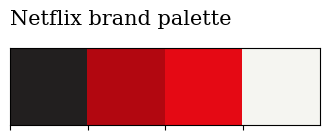

In [19]:
#設定Netflix的識別色做為資料用色參考
import seaborn as sns
import matplotlib.pyplot as plt
# Palette
sns.palplot(['#221f1f', '#b20710', '#e50914','#f5f5f1'])

plt.title("Netflix brand palette ",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

/tmp/ipykernel_33/4174049995.py:57: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  markerline, stemline, baseline = ax.stem(tl_sub_x, levels, use_line_collection=True)


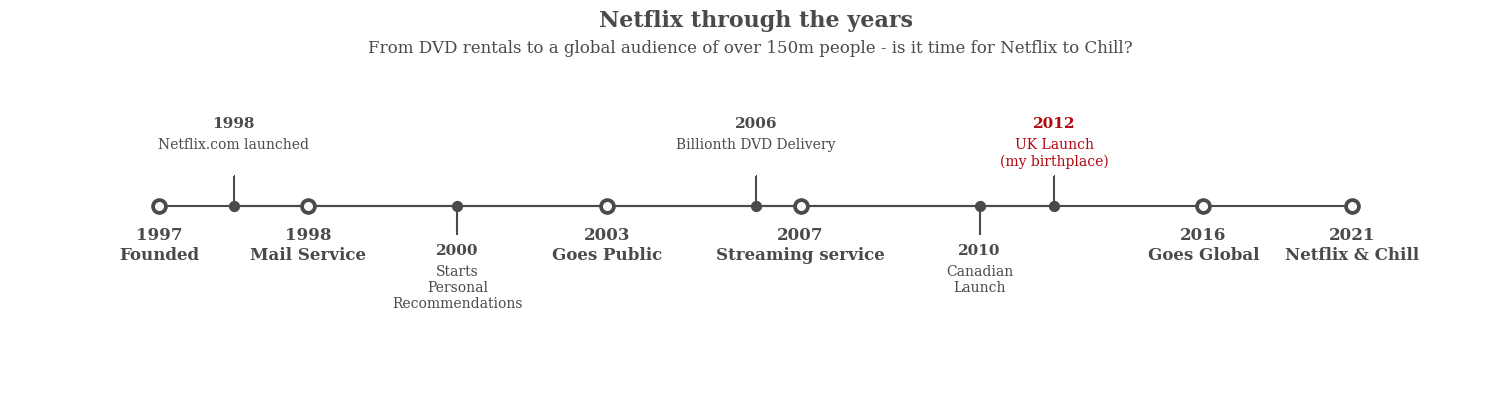

In [20]:
#Reference to draw timeline from https://www.kaggle.com/code/shivamb/netflix-shows-and-movies-exploratory-analysis
from datetime import datetime

## these go on the numbers below
tl_dates = [
    "1997\nFounded",
    "1998\nMail Service",
    "2003\nGoes Public",
    "2007\nStreaming service",
    "2016\nGoes Global",
    "2021\nNetflix & Chill"
]

tl_x = [1, 2, 4, 5.3, 8,9]

## these go on the numbers
tl_sub_x = [1.5,3,5,6.5,7]


tl_sub_times = [
    "1998","2000","2006","2010","2012"
]

tl_text = [
    "Netflix.com launched",
    "Starts\nPersonal\nRecommendations","Billionth DVD Delivery","Canadian\nLaunch","UK Launch\n(my birthplace)"]



# Set figure & Axes
fig, ax = plt.subplots(figsize=(15, 4), constrained_layout=True)
ax.set_ylim(-2, 1.75)
ax.set_xlim(0, 10)


# Timeline : line
ax.axhline(0, xmin=0.1, xmax=0.9, c='#4a4a4a', zorder=1)


# Timeline : Date Points
ax.scatter(tl_x, np.zeros(len(tl_x)), s=120, c='#4a4a4a', zorder=2)
ax.scatter(tl_x, np.zeros(len(tl_x)), s=30, c='#fafafa', zorder=3)
# Timeline : Time Points
ax.scatter(tl_sub_x, np.zeros(len(tl_sub_x)), s=50, c='#4a4a4a',zorder=4)

# Date Text
for x, date in zip(tl_x, tl_dates):
    ax.text(x, -0.55, date, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a',fontsize=12)
    

# Stemplot : vertical line
levels = np.zeros(len(tl_sub_x))    
levels[::2] = 0.3
levels[1::2] = -0.3
markerline, stemline, baseline = ax.stem(tl_sub_x, levels, use_line_collection=True)    
plt.setp(baseline, zorder=0)
plt.setp(markerline, marker=',', color='#4a4a4a')
plt.setp(stemline, color='#4a4a4a')

# Text
for idx, x, time, txt in zip(range(1, len(tl_sub_x)+1), tl_sub_x, tl_sub_times, tl_text):
    ax.text(x, 1.3*(idx%2)-0.5, time, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a' if idx!=len(tl_sub_x) else '#b20710', fontsize=11)
    
    ax.text(x, 1.3*(idx%2)-0.6, txt, va='top', ha='center', 
        fontfamily='serif',color='#4a4a4a' if idx!=len(tl_sub_x) else '#b20710')



# Spine
for spine in ["left", "top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)

# Ticks    
ax.set_xticks([]) 
ax.set_yticks([]) 

# Title
ax.set_title("Netflix through the years", fontweight="bold", fontfamily='serif', fontsize=16, color='#4a4a4a')
ax.text(2.4,1.57,"From DVD rentals to a global audience of over 150m people - is it time for Netflix to Chill?", fontfamily='serif', fontsize=12, color='#4a4a4a')

plt.show()

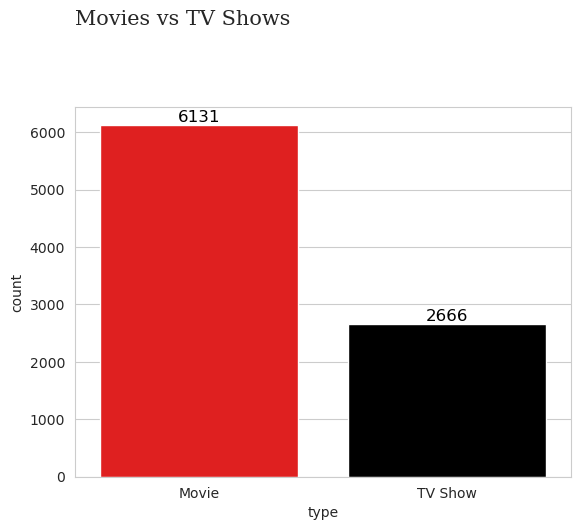

In [21]:
#PIC1:to draw count plot for two main categories

sns.set_style('whitegrid')
pic = sns.countplot(x="type", data=df, palette=["red", "black"])
plt.title("Movies vs TV Shows ",loc='left',fontfamily='serif',fontsize=15,y=1.2)

# Get the current axes, gca() stands for 'get current axes'
ax = plt.gca()

# Add text on top of each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

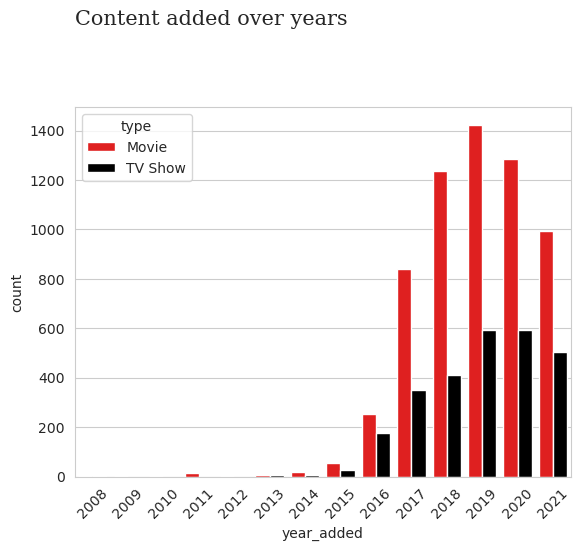

In [22]:
#PIC2:content added over years

sns.set_style('whitegrid')
pic = sns.countplot(x='year_added', data=df, hue="type",palette=["red", "black"])
plt.title("Content added over years ",loc='left',fontfamily='serif',fontsize=15,y=1.2)

# Rotate x-axis labels
plt.xticks(rotation=45)
plt.show()

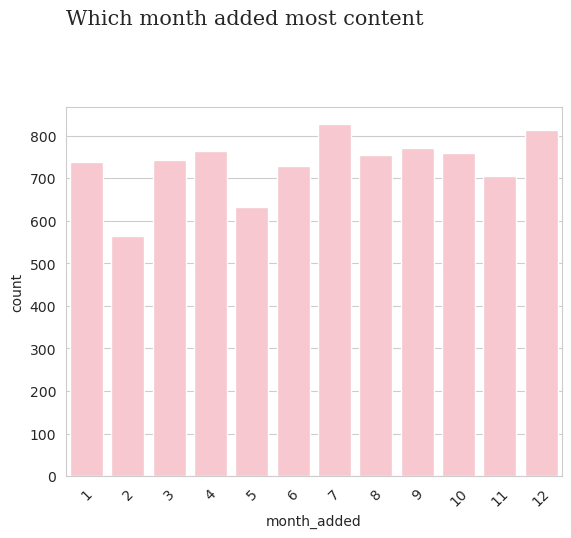

In [23]:
#PIC3:Which months added content most
#month_counts = df['month_added'].value_counts()
# 創建一個DataFrame來更改BAR顏色
#df_month = pd.DataFrame({'month_added': month_counts.index, 'count': month_counts.values})

# 使用 "count" 來決定顏色深淺
#r_p = sns.color_palette("Reds", n_colors=len(df_month))


sns.set_style('whitegrid')
pic = sns.countplot(x='month_added', data=df, color='pink')
plt.title("Which month added most content ",loc='left',fontfamily='serif',fontsize=15,y=1.2)

# Rotate x-axis labels
plt.xticks(rotation=45)
plt.show()

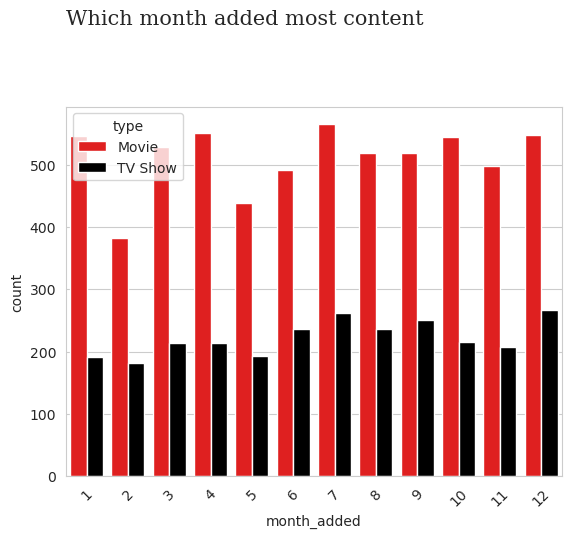

In [24]:
#PIC3:Which months added content most分類版

sns.set_style('whitegrid')
pic = sns.countplot(x='month_added', data=df, hue="type",palette=["red", "black"])
plt.title("Which month added most content ",loc='left',fontfamily='serif',fontsize=15,y=1.2)

# Rotate x-axis labels
plt.xticks(rotation=45)
plt.show()

In [25]:
# Drops 把國家別空值刪除
df = df[df["country"].notna()]
df.isnull().sum()

show_id             0
type                0
title               0
director         2216
cast              671
country             0
date_added          0
release_year        0
rating              3
duration            0
listed_in           0
description         0
year_added          0
month_added         0
season_count        0
duration_time       0
dtype: int64

In [26]:
# Lets retrieve just the first country
df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['first_country'].value_counts()

United States     3205
India             1008
United Kingdom     627
Canada             271
Japan              258
                  ... 
Namibia              1
Senegal              1
Luxembourg           1
Syria                1
Somalia              1
Name: first_country, Length: 86, dtype: int64

In [27]:
# Reducing name length 將國家的寫法統一

df['first_country'].replace('United States', 'USA', inplace=True)
df['first_country'].replace('United Kingdom', 'UK',inplace=True)
df['first_country'].replace('South Korea', 'S. Korea',inplace=True)
country_list=df['first_country'].value_counts()[0:10]
print(country_list.index)

Index(['USA', 'India', 'UK', 'Canada', 'Japan', 'France', 'S. Korea', 'Spain',
       'Mexico', 'Australia'],
      dtype='object')


In [28]:
#資料處理:取前10名國家data來畫圖
df_c = df["first_country"].value_counts(sort=True).head(10)
df = df[df["first_country"].isin(df_c.index)]
print(df.head())

  show_id     type                          title         director  \
0      s1    Movie           Dick Johnson Is Dead  Kirsten Johnson   
4      s5  TV Show                   Kota Factory              NaN   
7      s8    Movie                        Sankofa     Haile Gerima   
8      s9  TV Show  The Great British Baking Show  Andy Devonshire   
9     s10    Movie                   The Starling   Theodore Melfi   

                                                cast  \
0                                                NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...   
7  Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
8  Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
9  Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   

                                             country date_added  release_year  \
0                                      United States 2021-09-25          2020   
4                                              India 2021-09-24          2021   

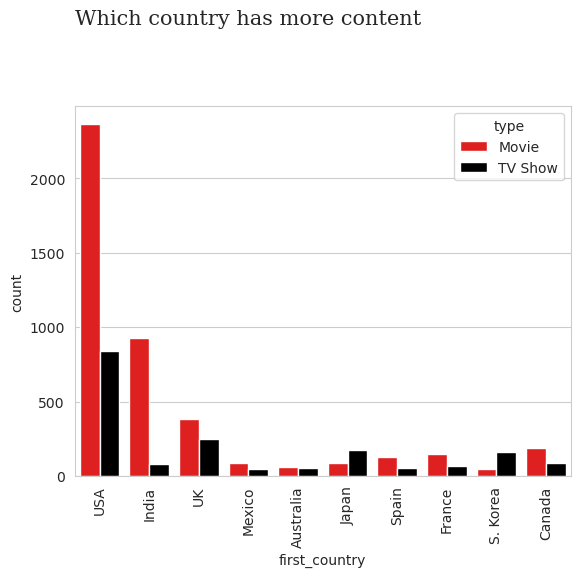

In [29]:
#PIC4:By country

sns.set_style('whitegrid')
pic = sns.countplot(x="first_country", data=df, hue="type",palette=["red", "black"])
plt.title("Which country has more content",loc='left',fontfamily='serif',fontsize=15,y=1.2)

# Rotate x-axis labels
plt.xticks(rotation=90)
plt.show()

In [30]:
#PIC5:處理Rating資料
drop=df["rating"].str.contains("min")
print(df[drop==False]["rating"].value_counts(sort=True))

TV-MA       2126
TV-14       1379
R            706
TV-PG        619
PG-13        444
PG           265
TV-Y7        216
TV-Y         202
TV-G         149
NR            63
G             39
TV-Y7-FV       4
NC-17          3
UR             3
Name: rating, dtype: int64


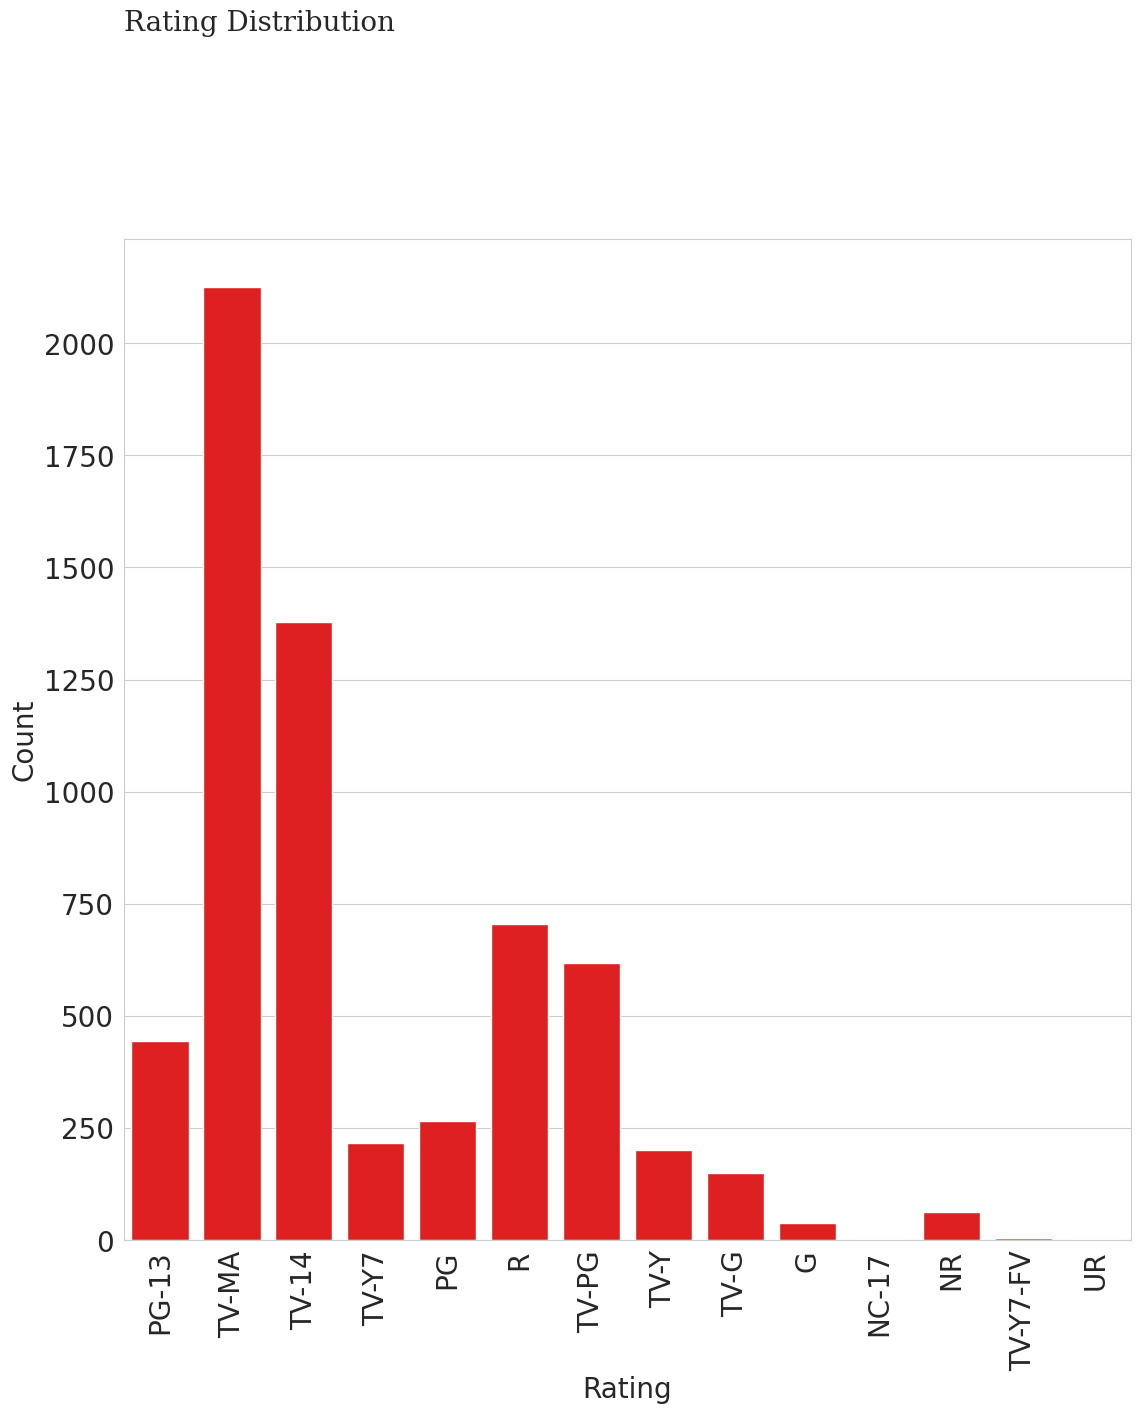

In [68]:
sns.set_style('whitegrid')
pic = sns.countplot(x="rating", data=df[drop==False], color='Red')
plt.title("Rating Distribution",loc='left',fontfamily='serif',fontsize=20,y=1.2)

# Rotate x-axis labels
plt.xlabel('Rating',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('rating.png')
plt.show()

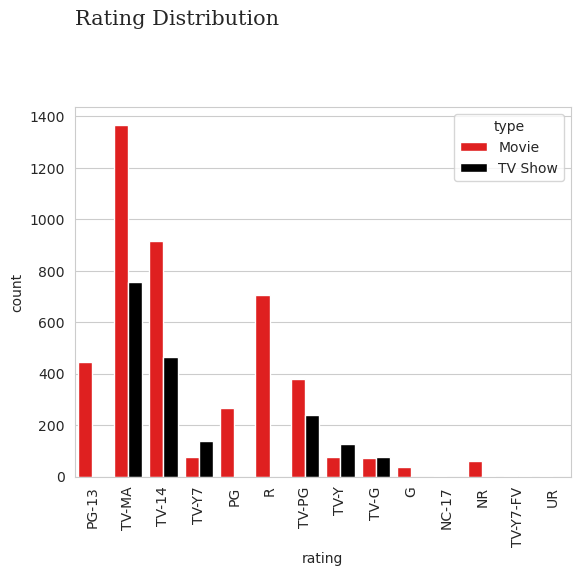

In [32]:
#畫Rating分類版
sns.set_style('whitegrid')
pic = sns.countplot(x="rating", data=df[drop==False], hue="type",palette=["red", "black"])
plt.title("Rating Distribution",loc='left',fontfamily='serif',fontsize=15,y=1.2)

# Rotate x-axis labels
plt.xticks(rotation=90)
plt.show()

In [33]:
#PIC6:Different genre category

genre = list(df['listed_in'])
genre_list = [item.lstrip(" ") for genlist in genre for item in genlist.split(",")]

print(genre_list[0:5])

['Documentaries', 'International TV Shows', 'Romantic TV Shows', 'TV Comedies', 'Dramas']


In [34]:
from collections import Counter
genre_counts = Counter(genre_list)
df_gen=pd.DataFrame(genre_counts.items(),columns=['Genre', 'Count']).set_index("Genre").sort_values(by="Count",ascending=False)

In [35]:
#確認data清洗完畢, 並只畫出前幾名
#print(df_gen.loc["International Movies"])
#Subset
df_gen = df_gen[df_gen["Count"]>=100].sort_values(by="Count",ascending=False)

In [36]:
print(df_gen.head())

                        Count
Genre                        
Dramas                   1718
International Movies     1473
Comedies                 1151
International TV Shows    704
Documentaries             680


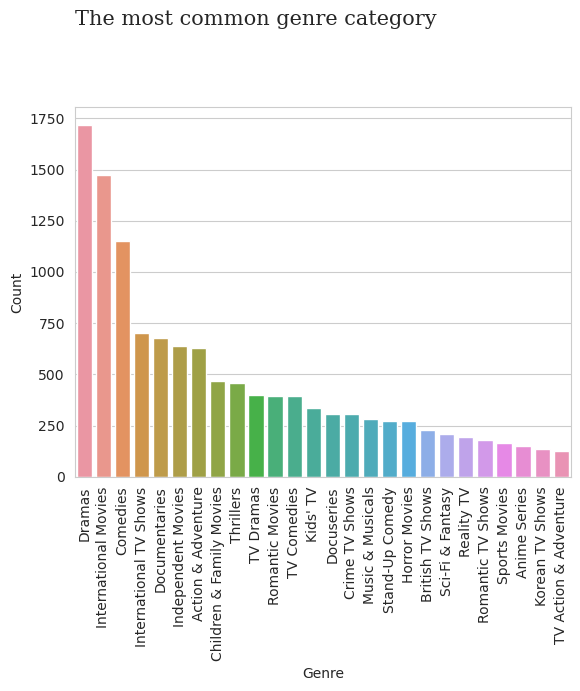

In [37]:
sns.set_style('whitegrid')
pic = sns.barplot(x=df_gen.index,y="Count", data=df_gen)
plt.title("The most common genre category",loc='left',fontfamily='serif',fontsize=15,y=1.2)

# Rotate x-axis labels
plt.xticks(rotation=90)
plt.show()

In [38]:
#處理影片描述以畫文字雲圖
descr = list(df['description'])
descr_list = [item.lower().replace(".","").replace("'","").replace("-","") for delist in descr for item in delist.split(" ")]

In [39]:
descr_list=Counter(descr_list)
df_des=pd.DataFrame(descr_list.items(),columns=['Word', 'Count']).set_index("Word").sort_values(by="Count",ascending=False)
print(df_des[df_des['Count']<500])

           Count
Word            
life         485
young        483
–            454
up           423
they         378
...          ...
revisions      1
"laughin"      1
tomlin,        1
dogg,          1
roughneck      1

[20612 rows x 1 columns]


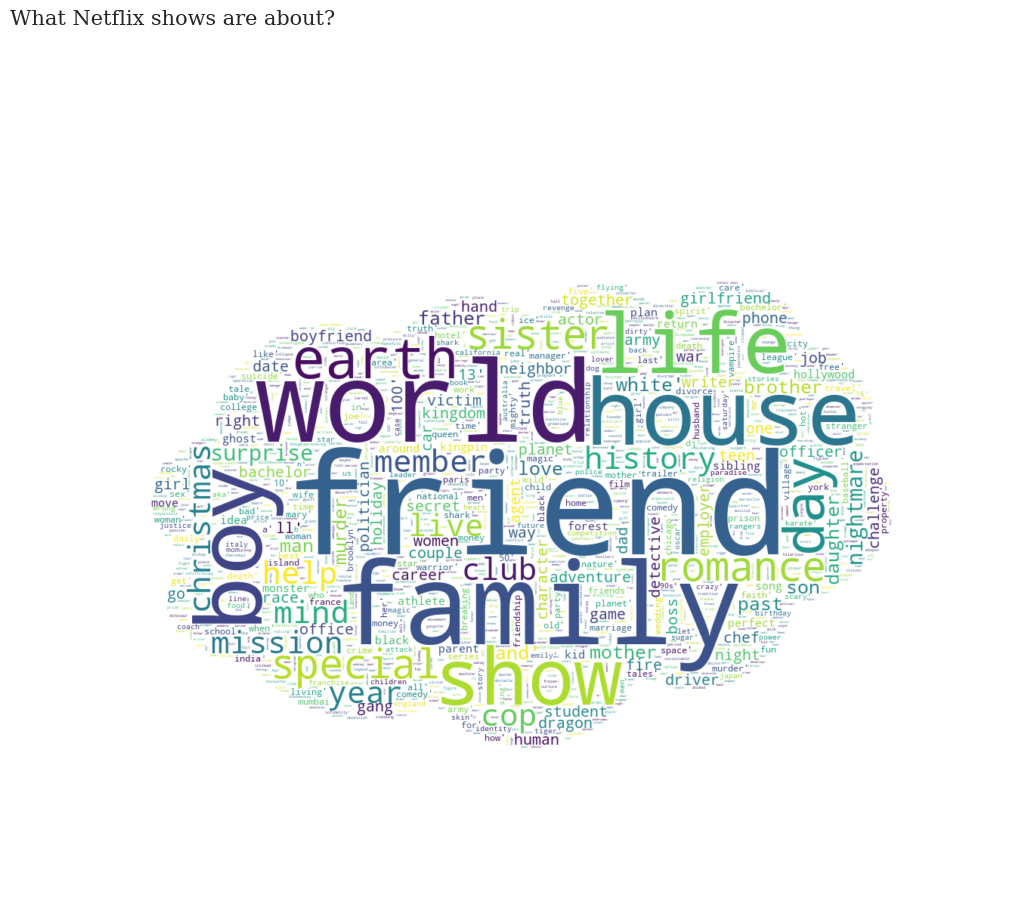

In [40]:
#PIC7:文字雲圖
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

text = list(set(descr_list))
plt.rcParams['figure.figsize'] = (13, 13)
stopwords = set(STOPWORDS)
stopwords.update(["s'", "t'", "000'","the'"])

#assigning shape to the word cloud
mask = np.array(Image.open('/kaggle/input/wordcloud/wordcloud_mask.png'))
wordcloud = WordCloud(stopwords=stopwords, max_words=1000000,background_color="white",mask=mask).generate(str(descr_list))

plt.imshow(wordcloud,interpolation="bilinear")
plt.title("What Netflix shows are about?",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.axis("off")
plt.show()

In [42]:
#處理duration的資料格式
dur_mask = [x for x in range(20)]
dur_mask = [str(x) for x in dur_mask]
print(dur_mask)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19']


In [43]:
#確認極端值有無需要處理-一切正常
print(df[df['duration_time'].isin(dur_mask)][['duration','season_count','duration_time']])

     duration season_count duration_time
1425   14 min                         14
1484    8 min                          8
1557    9 min                          9
1669   13 min                         13
2109   17 min                         17
2248   17 min                         17
2713    5 min                          5
3007   17 min                         17
3364   14 min                         14
3535   10 min                         10
3709   15 min                         15
3777    3 min                          3
4707   12 min                         12
5375   14 min                         14
5456   19 min                         19
8205   18 min                         18


In [44]:
#將duration轉為數值格式
df['duration_time']=pd.to_numeric(df['duration_time'], errors='coerce')

In [45]:
#seasons = df.query("type == 'Movie'").groupby('duration_time').agg({'title': 'count'}).reset_index()
#print(seasons.head())

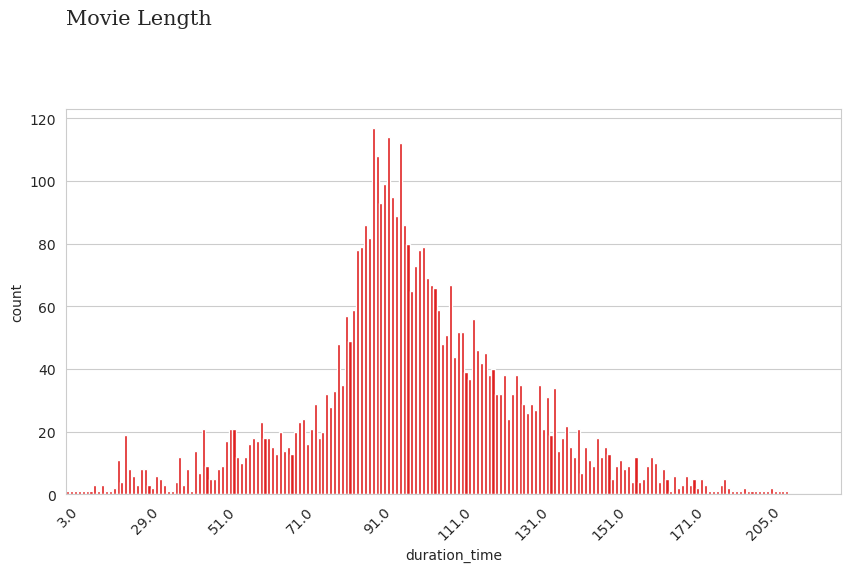

In [46]:
#PIC8:畫電影影片長度分布
fig, ax = plt.subplots(figsize=(10, 5))
sns.set_style('whitegrid')
pic = sns.countplot(x='duration_time', data=df.query("type == 'Movie'"), color="red")
plt.title("Movie Length",loc='left',fontfamily='serif',fontsize=15,y=1.2)

# Set the limits of x-axis
#plt.xlim(0, max(df['duration_time']))
# Rotate x-axis labels

plt.xticks(ticks=np.arange(0, 210, 20),rotation=45)
plt.show()

([], [])

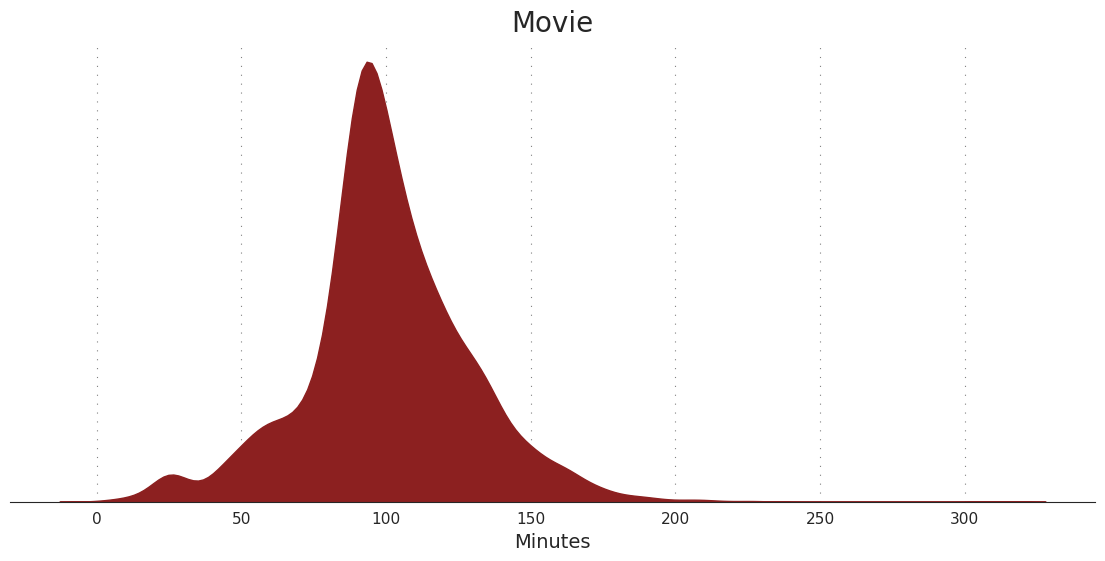

In [49]:
#改用KDE圖畫電影影片長度
fig = plt.figure(figsize = (14, 6))


sns.set_style("white")
plt.title('Movie', size = 20)
a = sns.kdeplot(df.query('type == "Movie"')['duration_time'], color = '#8c2020', fill=True, alpha = 1)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', zorder = 0,  dashes = (1,7))
for i in ['right', 'left', 'top']:
    a.spines[i].set_visible(False)
a.tick_params(labelsize = 11)
plt.ylabel('')
plt.xlabel('Minutes', size = 14)
plt.yticks([])



In [50]:
import plotly.figure_factory as ff
x1 = df['duration_time'].dropna().astype(float)
fig = ff.create_distplot([x1], ['a'], bin_size=0.7, curve_type='normal', colors=["Red"])
fig.update_layout(title_text='Distplot with Normal Distribution')
fig.show()

In [47]:
#處理電視影集季數-轉換為數值
df['season_count']=pd.to_numeric(df['season_count'], downcast="integer", errors='coerce')

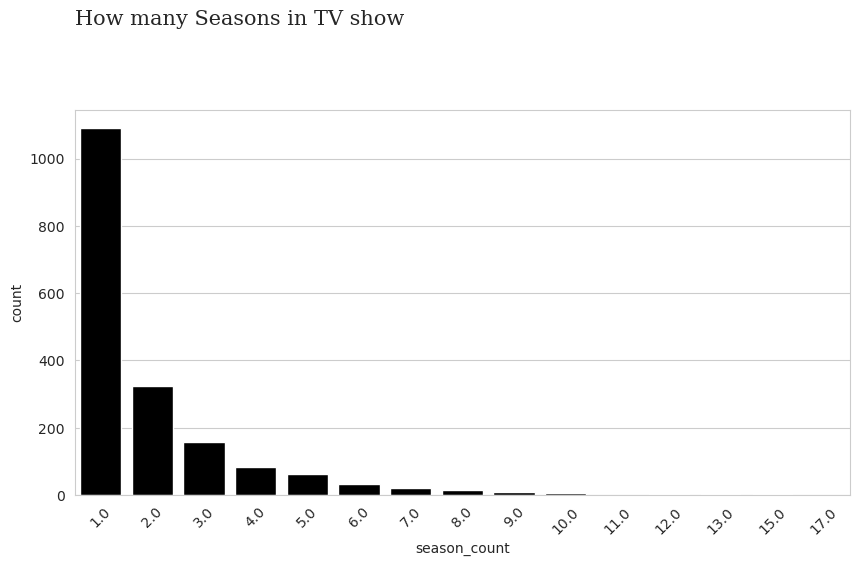

In [48]:
#PIC9:畫出電視劇集季數分布圖
fig, ax = plt.subplots(figsize=(10, 5))
sns.set_style('whitegrid')
pic = sns.countplot(x='season_count', data=df.query("type == 'TV Show'"), color="black")
plt.title("How many Seasons in TV show",loc='left',fontfamily='serif',fontsize=15,y=1.2)

# Set the limits of x-axis
#plt.xlim(0, max(df['duration_time']))
# Rotate x-axis labels

plt.xticks(rotation=45)
plt.show()

In [73]:
print(df['season_count'].describe())
print(df['season_count'].value_counts())

count    1807.000000
mean        1.966796
std         1.754287
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        17.000000
Name: season_count, dtype: float64
1.0     1090
2.0      323
3.0      158
4.0       84
5.0       61
6.0       33
7.0       21
8.0       16
9.0        8
10.0       5
13.0       2
15.0       2
12.0       2
17.0       1
11.0       1
Name: season_count, dtype: int64


In [71]:
print(df[df['type'] == "Movie"]['duration_time'].describe())

count    4413.000000
mean      100.143213
std        28.478943
min         3.000000
25%        87.000000
50%        98.000000
75%       116.000000
max       312.000000
Name: duration_time, dtype: float64


In [52]:
#PIC9:Most Actors in USA

actor = list(df[df['first_country']=='USA']['cast'].dropna())
actor_list = [item for actlist in actor for item in actlist.split(",")]

print(actor_list[0:5])

['Kofi Ghanaba', ' Oyafunmike Ogunlano', ' Alexandra Duah', ' Nick Medley', ' Mutabaruka']


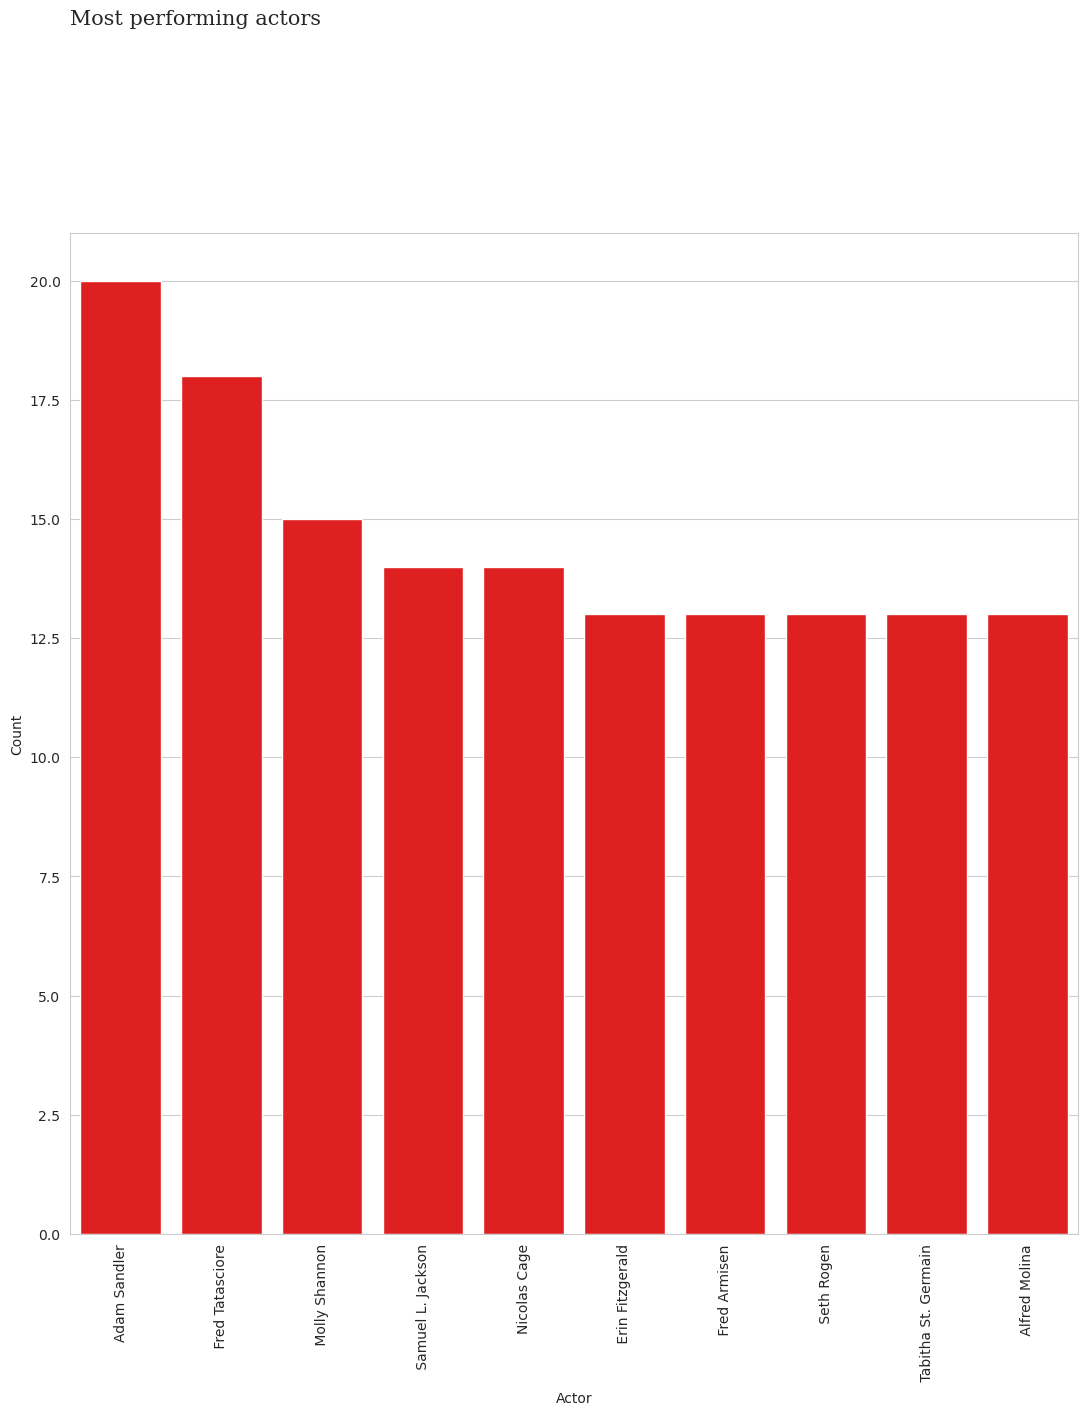

In [53]:
#PIC9:Most Actors in Movies-USA

from collections import Counter
actor_counts = Counter(actor_list)
df_actor=pd.DataFrame(actor_counts.items(),columns=['Actor', 'Count']).set_index("Actor").sort_values(by="Count",ascending=False)
sns.set_style('whitegrid')
pic = sns.barplot(x=df_actor.head(10).index,y="Count", data=df_actor.head(10),color="Red")
plt.title("Most performing actors",loc='left',fontfamily='serif',fontsize=15,y=1.2)

# Rotate x-axis labels
plt.xticks(rotation=90)
plt.savefig('actors.png')
plt.show()

In [54]:
#df_actor=pd.DataFrame(actor_counts.items(),columns=['Actor', 'Count']).set_index("Actor").sort_values(by="Count",ascending=False)

df_dire= df[df['first_country']=='USA']['director'].value_counts().reset_index()
df_dire.columns = ["Director", "Count"]
df_dire = df_dire.head(10)
print(df_dire)

           Director  Count
0      Marcus Raboy     15
1         Jay Karas     14
2       Jay Chapman     12
3  Steven Spielberg     11
4   Martin Scorsese     10
5   Shannon Hartman      8
6  Robert Rodriguez      8
7       Troy Miller      8
8  Don Michael Paul      8
9       Ryan Polito      8


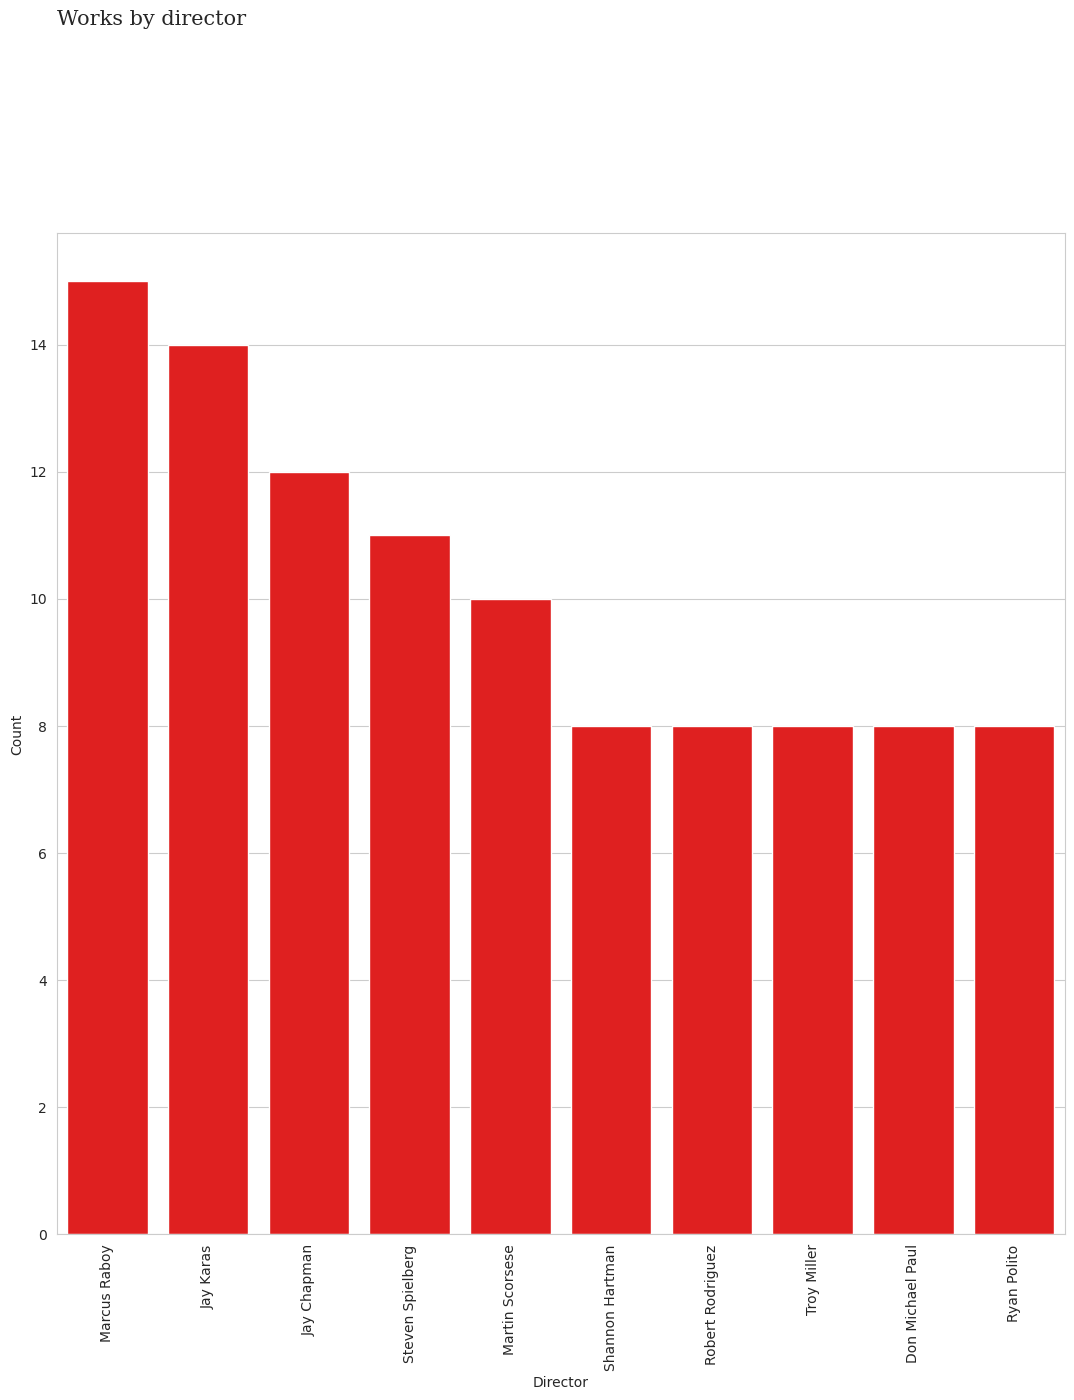

In [55]:
#PIC10:Most Works Director USA
sns.set_style('whitegrid')
pic = sns.barplot(x="Director", y="Count",data=df_dire,color="Red")
plt.title("Works by director",loc='left',fontfamily='serif',fontsize=15,y=1.2)

# Rotate x-axis labels
plt.xticks(rotation=90)
plt.savefig('director.png')
plt.show()